<a href="https://colab.research.google.com/github/Git-Hub-Pro/Kalmanfilter/blob/master/simple_kalman_filter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [0]:
def get_volt():
    """Measure voltage."""
    v = np.random.normal(0,2) 
    volt_true = 14.4
    z_volt_meas = volt_true + v
    return z_volt_meas

In [0]:
def kalman_filter(z_meas,x_esti,P):
    """Kalman Filter Algorithm for One Variable.
       return Kalman Gain for Drawing.
    """
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q

    # (2) Kalman Gain.
    K = P_pred * H /(H * P_pred * H + R)

    # (3) Estimation
    x_esti = x_pred + K * (z_meas - H * x_pred)

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P, K

In [0]:
# Input parameters.
time_end = 10
dt = 0.2

In [0]:
# Initialization for system model.
A = 1
H = 1
Q = 0
R = 4
# Initialization for estimation
x_0 = 14
P_0 = 6
K_0 = 1

In [0]:
time = np.arange(0,time_end,dt)
n_samples = len(time)
volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)
P_save = np.zeros(n_samples)
K_save = np.zeros(n_samples)

In [0]:
x_esti, P, K = None, None, None
for i in range(n_samples):
    z_meas = get_volt()
    if i == 0:
        x_esti, P, K = x_0, P_0, K_0
    else :
        x_esti, P, K = kalman_filter(z_meas,x_esti,P)
    
    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti
    P_save[i] = P
    K_save[i] = K

Text(0, 0.5, 'Kalman Gain (K)')

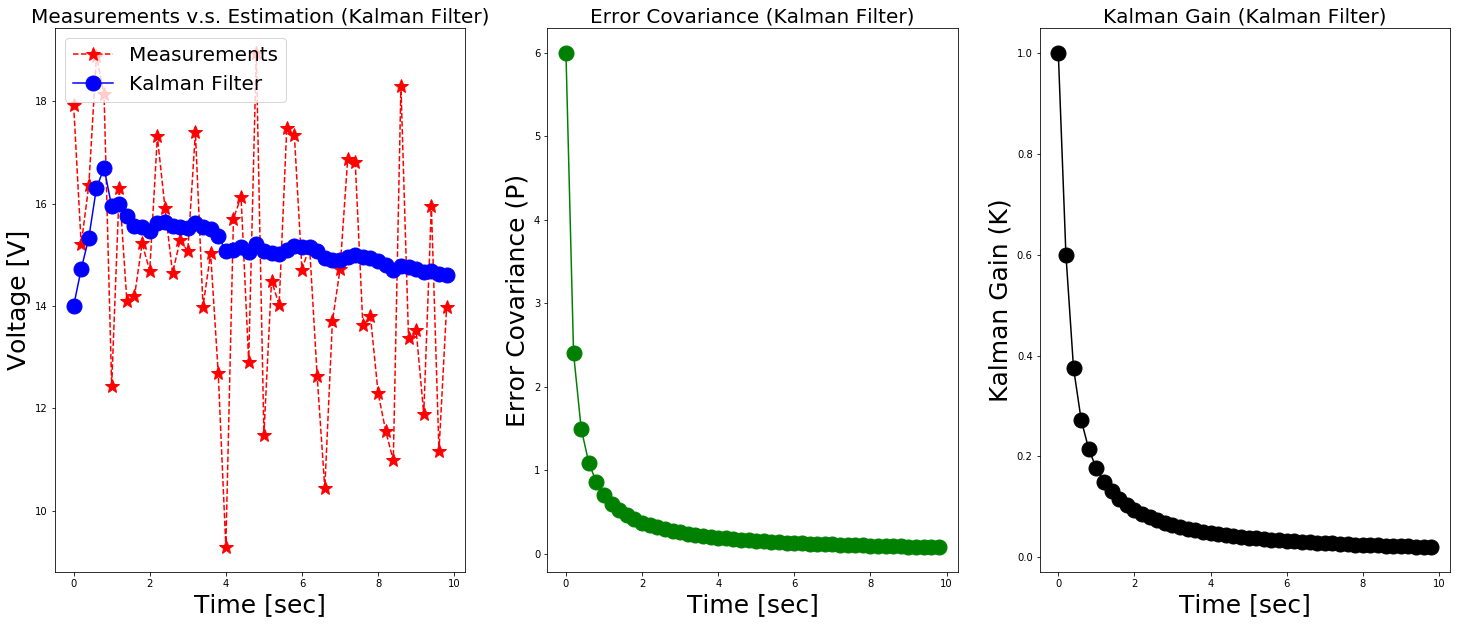

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,10))

plt.subplot(1, 3, 1)
plt.plot(time, volt_meas_save, 'r*--', label='Measurements', markersize=15)
plt.plot(time, volt_esti_save, 'bo-', label='Kalman Filter', markersize=15)
plt.legend(loc='upper left', fontsize=20)
plt.title('Measurements v.s. Estimation (Kalman Filter)', fontsize=20)
plt.xlabel('Time [sec]', fontsize=25)
plt.ylabel('Voltage [V]', fontsize=25)

plt.subplot(1, 3, 2)
plt.plot(time, P_save, 'go-', markersize=15)
plt.title('Error Covariance (Kalman Filter)', fontsize=20)
plt.xlabel('Time [sec]', fontsize=25)
plt.ylabel('Error Covariance (P)', fontsize=25)

plt.subplot(1, 3, 3)
plt.plot(time, K_save, 'ko-', markersize=15)
plt.title('Kalman Gain (Kalman Filter)', fontsize=20)
plt.xlabel('Time [sec]', fontsize=25)
plt.ylabel('Kalman Gain (K)', fontsize=25)